In [ ]:
import torch
import torch
import matplotlib.pyplot as plt
import seaborn as sns
# Reproducibility
#torch.manual_seed(1)
N = 2000  
P= 200
# Scatter of x vs y 
torch.manual_seed(1)

# -------------------------
# 2) Generate f (3 x 200)
#    f[0,i] ~ t1_i * N(0,1), f[1,i], f[2,i] ~ t2_i * N(0,1)
# -------------------------

t0 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t1 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t2 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t11 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t12 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t21 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t22 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1

a0 = t0 * torch.randn(P)
b1 = t1 * torch.randn(P)
b2 = t2 * torch.randn(P)
detla11= t11 *torch.randn(P)

detla12= t11 *torch.randn(P)
detla21= t11 *torch.randn(P)
detla22= t11 *torch.randn(P)  
f_mat = torch.stack([a0,b1,b2, detla11, detla12,detla21, detla22 ], dim=0)
f_mat

In [ ]:

N= 1000

L = torch.zeros(N, 7, dtype=torch.float32)


L[:,0]=1
L[0:500, 1]=1

L [500:,2]=1
L[0:250,3]=1
L[251:500,4]=1

L[501:750,5]=1

L[751:,6]=1

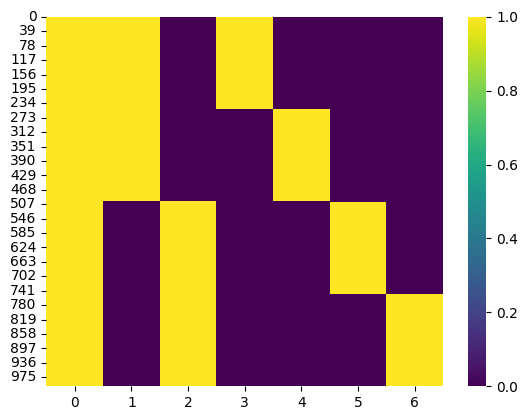

In [ ]:


sns.heatmap(L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()


In [ ]:
L.shape

torch.Size([1000, 7])

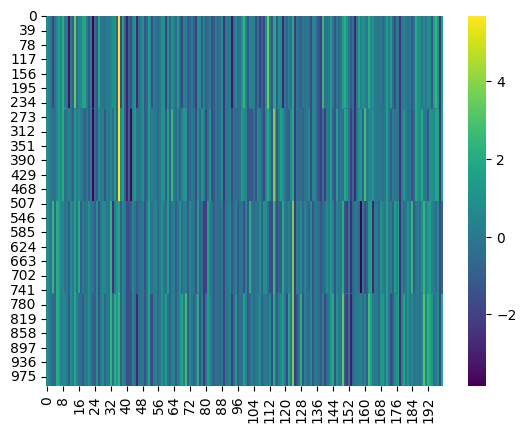

In [ ]:
X_true= L@f_mat 
Z = L@f_mat + 0.5*torch.randn(N, P)  * 2.5  # (N, M)
sns.heatmap(X_true , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

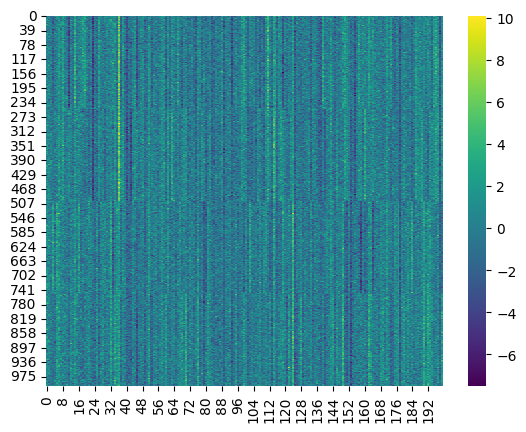

In [ ]:
sns.heatmap(Z , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [ ]:
from cebmf_torch import cEBMF

In [ ]:
 
mycebmf2=  cEBMF(data=Z,self_row_cov=True,
                 prior_L="cgb_sharp", K=10,
                  allow_backfitting=False ) 
mycebmf2.initialise_factors()
mycebmf2.fit(20)

[CGB] Epoch   1/80 | Loss=63.920966 | mu=0.9950 | sigma=0.1990 | mean π0=0.6067
[CGB] Epoch  10/80 | Loss=63.334558 | mu=0.9715 | sigma=0.1943 | mean π0=0.9970
[CGB] Epoch  20/80 | Loss=63.331438 | mu=0.9698 | sigma=0.1940 | mean π0=0.9993
[CGB] Epoch  30/80 | Loss=63.331169 | mu=0.9696 | sigma=0.1939 | mean π0=0.9996
[CGB] Epoch  40/80 | Loss=63.331027 | mu=0.9695 | sigma=0.1939 | mean π0=0.9997
[CGB] Epoch  50/80 | Loss=63.330940 | mu=0.9694 | sigma=0.1939 | mean π0=0.9998
[CGB] Epoch  60/80 | Loss=63.330883 | mu=0.9693 | sigma=0.1939 | mean π0=0.9998
[CGB] Epoch  70/80 | Loss=63.330845 | mu=0.9692 | sigma=0.1938 | mean π0=0.9999
[CGB] Epoch  80/80 | Loss=63.330819 | mu=0.9692 | sigma=0.1938 | mean π0=0.9999
[CGB] Epoch   1/80 | Loss=24.568013 | mu=1.0051 | sigma=0.2010 | mean π0=0.4857
[CGB] Epoch  10/80 | Loss=24.036714 | mu=1.0514 | sigma=0.2103 | mean π0=0.5079
[CGB] Epoch  20/80 | Loss=23.555618 | mu=1.1049 | sigma=0.2210 | mean π0=0.5000
[CGB] Epoch  30/80 | Loss=23.333305 | mu

CEBMFResult(L=tensor([[1.0000e-19, 1.2280e+00, 1.1422e+00,  ..., 1.0694e-08, 1.5663e-05,
         3.6106e-07],
        [1.4695e-19, 1.0072e+00, 1.2989e+00,  ..., 1.7968e-08, 1.5420e-07,
         9.2304e-01],
        [2.9141e-20, 1.2247e+00, 9.4847e-01,  ..., 4.8004e-09, 9.2076e-01,
         3.1547e-06],
        ...,
        [3.8647e-20, 1.4134e+00, 1.3346e+00,  ..., 2.9371e-07, 4.4277e-05,
         1.1183e+00],
        [3.6703e-20, 1.3352e+00, 1.0258e+00,  ..., 1.7600e-08, 7.2102e-08,
         1.0850e+00],
        [1.2690e-19, 1.3807e+00, 1.0176e+00,  ..., 4.2738e-08, 8.5632e-01,
         1.1424e+00]]), F=tensor([[-1.7940e-10,  4.4229e-01,  2.9374e-01,  ...,  1.9881e-01,
          2.0254e-03,  1.3263e-03],
        [ 9.3201e-11,  1.4632e-01,  2.5492e-01,  ...,  6.4044e-03,
          1.0931e-02, -1.2108e-03],
        [-2.6807e-12, -1.6136e-01, -9.1419e-04,  ...,  1.2359e-01,
         -1.3009e-01, -3.8209e-03],
        ...,
        [ 5.0870e-11,  1.7049e-01,  9.5512e-01,  ...,  2.9462e-01

In [ ]:
k=0
#mycebmf2._update_factors(k)

In [ ]:
mycebmf01=  cEBMF(data=Z, 
                 prior_L="gbinary", K=10,
                  allow_backfitting=False ) 
mycebmf01.initialise_factors()
 
 
mycebmf01.fit(20)

CEBMFResult(L=tensor([[1.2989e-23, 7.2272e+00, 5.4796e+00,  ..., 7.7255e-01, 6.4726e-01,
         1.2989e-23],
        [1.2989e-23, 6.1447e+00, 5.5070e+00,  ..., 8.5566e-01, 6.1446e-01,
         1.2989e-23],
        [1.2989e-23, 7.7199e+00, 5.2741e+00,  ..., 7.6716e-01, 7.0894e-01,
         1.2989e-23],
        ...,
        [1.2989e-23, 9.4654e+00, 1.8574e-04,  ..., 8.2688e-01, 6.8331e-01,
         1.2989e-23],
        [1.2989e-23, 8.7650e+00, 3.3321e-06,  ..., 8.0997e-01, 6.7961e-01,
         1.2989e-23],
        [1.2989e-23, 9.5553e+00, 1.0961e-05,  ..., 8.4517e-01, 6.7256e-01,
         1.2989e-23]]), F=tensor([[ 6.9923e-15,  1.0297e-01,  1.3880e-01,  ...,  2.5251e-04,
          5.0509e-05,  7.2908e-15],
        [ 4.1982e-15,  4.6254e-02,  8.3166e-02,  ...,  1.5365e-04,
          2.3713e-05,  4.0900e-15],
        [-2.4328e-15, -2.4796e-02,  6.1237e-06,  ..., -9.4719e-05,
         -2.1394e-05, -2.4391e-15],
        ...,
        [ 6.5245e-15,  8.3537e-02,  2.7526e-01,  ...,  2.5804e-04

In [ ]:
mycebmf0=  cEBMF(data=Z ,K=10 ) 
mycebmf0.initialise_factors()
mycebmf0.fit(20)

CEBMFResult(L=tensor([[-14.6431,  -8.5592,  -7.8450,  ...,   0.0000,   0.0000,   0.0000],
        [-14.4401,  -8.6061,  -4.8383,  ...,   0.0000,   0.0000,   0.0000],
        [-14.8648,  -8.1609,  -8.3798,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [-12.8027,   9.1314,   2.1035,  ...,   0.0000,   0.0000,   0.0000],
        [-10.7544,  10.0296,   0.9642,  ...,   0.0000,   0.0000,   0.0000],
        [-12.4057,  10.5523,   0.3726,  ...,   0.0000,   0.0000,   0.0000]]), F=tensor([[-6.2307e-02,  2.6313e-02,  1.8636e-02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-3.2737e-02,  9.7870e-04,  1.5961e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 8.5727e-03, -1.1889e-02, -1.5402e-04,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-8.9937e-02, -2.9376e-02,  2.6721e-02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.6103e-01,  2.4437e-04, -1.9666e-04,  ...,  0.0000e+00,
          0.0000e+00,

In [ ]:
 
mycebmf1=  cEBMF(data=Z,self_row_cov=True,
                 prior_L="cgb", K=10,
                  allow_backfitting=False ) 
mycebmf1.initialise_factors()
 

mycebmf1.F = mycebmf0.F
mycebmf1.fit(20)

[CGB] Epoch 10/50, Loss=5.4599, mu2=-0.080, sigma2=13.002
[CGB] Epoch 20/50, Loss=5.4543, mu2=-0.160, sigma2=13.129
[CGB] Epoch 30/50, Loss=5.4488, mu2=-0.241, sigma2=13.408
[CGB] Epoch 40/50, Loss=5.4420, mu2=-0.322, sigma2=12.966
[CGB] Epoch 50/50, Loss=5.4359, mu2=-0.402, sigma2=12.832
[CGB] Epoch 10/50, Loss=5.0340, mu2=0.071, sigma2=8.531
[CGB] Epoch 20/50, Loss=5.0335, mu2=0.137, sigma2=8.811
[CGB] Epoch 30/50, Loss=5.0323, mu2=0.201, sigma2=8.645
[CGB] Epoch 40/50, Loss=5.0314, mu2=0.261, sigma2=8.604
[CGB] Epoch 50/50, Loss=5.0310, mu2=0.319, sigma2=8.650
[CGB] Epoch 10/50, Loss=3.8776, mu2=-0.008, sigma2=5.741
[CGB] Epoch 20/50, Loss=3.8650, mu2=-0.020, sigma2=6.035
[CGB] Epoch 30/50, Loss=3.8672, mu2=-0.034, sigma2=5.987
[CGB] Epoch 40/50, Loss=3.8544, mu2=-0.047, sigma2=6.118
[CGB] Epoch 50/50, Loss=3.8524, mu2=-0.056, sigma2=6.109
[CGB] Epoch 10/50, Loss=3.7916, mu2=0.048, sigma2=5.816
[CGB] Epoch 20/50, Loss=3.7660, mu2=0.099, sigma2=5.753
[CGB] Epoch 30/50, Loss=3.7521, m

CEBMFResult(L=tensor([[-1.4122e+01, -7.7115e+00, -7.4353e+00,  ..., -8.8855e-14,
         -2.7547e-14,  3.6736e-12],
        [-1.4047e+01, -7.8261e+00, -4.6869e+00,  ..., -1.3428e-13,
         -4.2749e-13,  9.1239e-12],
        [-1.4421e+01, -7.3690e+00, -8.1832e+00,  ..., -1.4921e-12,
         -1.6552e-13,  5.0035e-12],
        ...,
        [-1.2344e+01,  8.7118e+00,  4.1873e-05,  ..., -3.4769e-12,
         -3.9626e-13,  1.8575e-11],
        [-1.0380e+01,  9.4573e+00, -4.8193e-06,  ..., -4.9517e-12,
         -1.8711e-13,  4.6764e-12],
        [-1.2048e+01,  9.9074e+00, -4.3266e-05,  ..., -2.2906e-12,
         -4.6988e-13,  8.5571e-12]]), F=tensor([[-6.3601e-02,  2.8307e-02,  2.3899e-02,  ...,  5.0482e-09,
         -5.0442e-10, -6.3626e-08],
        [-3.3392e-02,  1.0617e-03,  1.4984e-03,  ..., -5.3910e-09,
          1.3367e-09,  3.4492e-07],
        [ 8.6604e-03, -1.2851e-02, -1.5713e-04,  ...,  1.3137e-08,
          1.7690e-09, -6.1207e-07],
        ...,
        [-9.1765e-02, -3.1204

In [ ]:
mycebmf1.F

tensor([[-6.3601e-02,  2.8307e-02,  2.3899e-02,  ...,  5.0482e-09,
         -5.0442e-10, -6.3626e-08],
        [-3.3392e-02,  1.0617e-03,  1.4984e-03,  ..., -5.3910e-09,
          1.3367e-09,  3.4492e-07],
        [ 8.6604e-03, -1.2851e-02, -1.5713e-04,  ...,  1.3137e-08,
          1.7690e-09, -6.1207e-07],
        ...,
        [-9.1765e-02, -3.1204e-02,  2.3759e-02,  ..., -1.9150e-08,
         -4.6265e-09,  1.4588e-07],
        [ 1.6387e-01,  1.1084e-04, -1.6117e-05,  ...,  2.2525e-08,
         -8.7758e-10, -3.6471e-07],
        [-8.1634e-02, -4.5746e-02,  3.5277e-02,  ..., -2.4814e-08,
         -8.3210e-11,  1.4367e-07]])

(array([ 34., 146.,  64.,   5., 502.,   0.,  21., 122.,  94.,  12.]),
 array([-9.66604424, -7.70151424, -5.73698378, -3.77245331, -1.80792332,
         0.15660667,  2.12113762,  4.08566761,  6.0501976 ,  8.01472855,
         9.97925758]),
 <BarContainer object of 10 artists>)

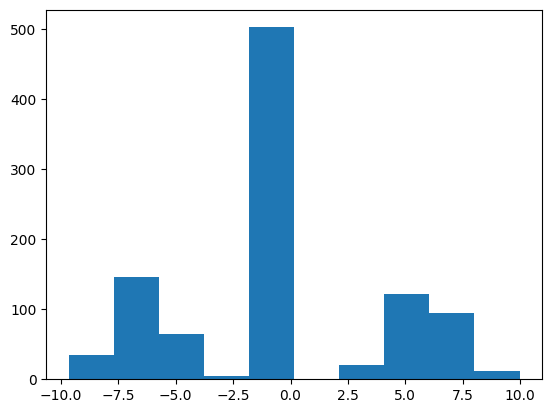

In [ ]:
plt.hist(mycebmf1.L[:,3 ])


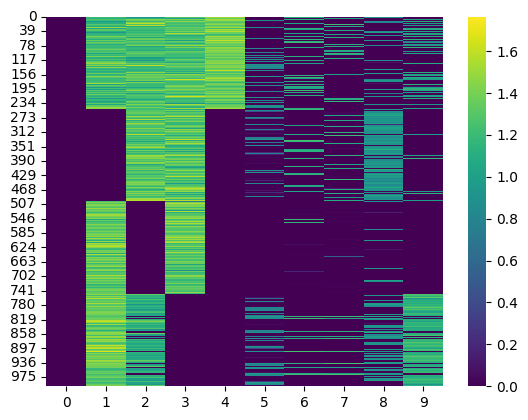

In [ ]:
sns.heatmap(mycebmf2.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

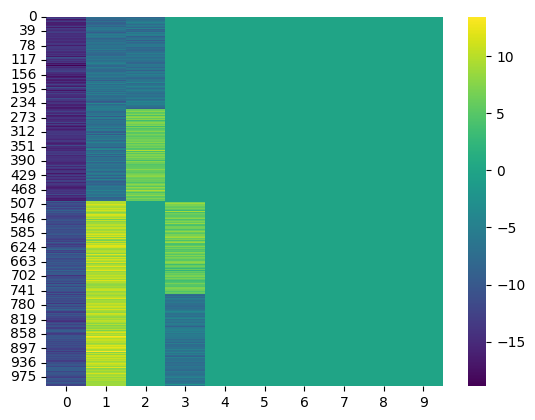

In [ ]:
 
sns.heatmap(mycebmf1.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

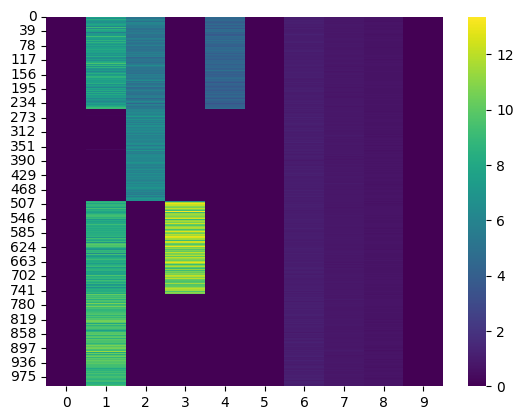

In [ ]:
sns.heatmap(mycebmf01.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

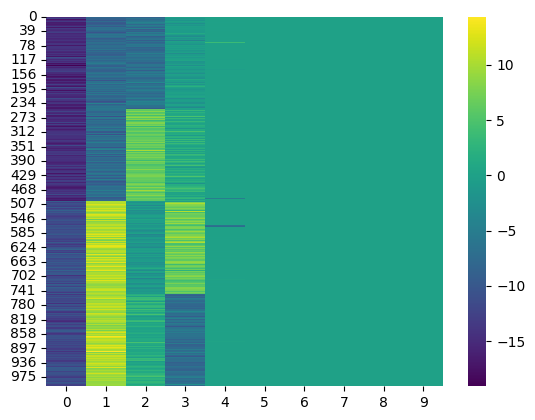

In [ ]:
sns.heatmap(mycebmf0.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [ ]:
mycebmf1.L[:,4]

tensor([-7.4332e-12,  0.0000e+00, -2.2009e-12, -6.1044e-12, -1.9974e-11,
        -6.3951e-12, -8.3053e-14, -8.3053e-14, -2.9069e-13, -3.3221e-13,
        -4.1526e-12, -9.7172e-12,  0.0000e+00, -2.2840e-12, -1.4534e-12,
        -3.6959e-12, -6.2290e-13, -4.5679e-12, -9.1358e-13, -4.1526e-13,
        -1.3704e-12, -2.9069e-13, -6.4366e-12, -2.7117e-11, -8.3053e-12,
        -1.3870e-11, -5.8968e-12, -6.1044e-12, -7.9731e-12, -1.2458e-13,
        -4.8586e-12, -2.9069e-13, -2.0971e-11, -1.7358e-11, -1.6611e-12,
        -3.2141e-11, -5.0662e-12, -3.6128e-12, -6.2290e-12, -9.5511e-13,
        -7.6824e-12, -1.5365e-12, -2.6785e-11, -4.3188e-12, -1.9517e-12,
        -8.3883e-12, -1.3745e-11, -1.9933e-12, -1.1171e-11, -8.3053e-14,
        -7.0595e-13, -8.6790e-12, -7.6824e-12, -1.0382e-12, -4.1527e-12,
        -6.5197e-12, -1.0755e-11, -9.1358e-13, -7.9731e-12, -3.9450e-12,
        -3.6959e-12, -5.9798e-12, -2.2009e-12, -6.2290e-13, -1.5365e-12,
        -5.2739e-12, -8.8036e-12, -5.1493e-12, -3.8

In [ ]:
plt.scatter(L[:,3],mycebmf1.L[:,2])

In [ ]:
plt.hist(mycebmf1.L[:,4 ])

In [ ]:
plt.scatter(L[:,1],mycebmf1.L[:,3])

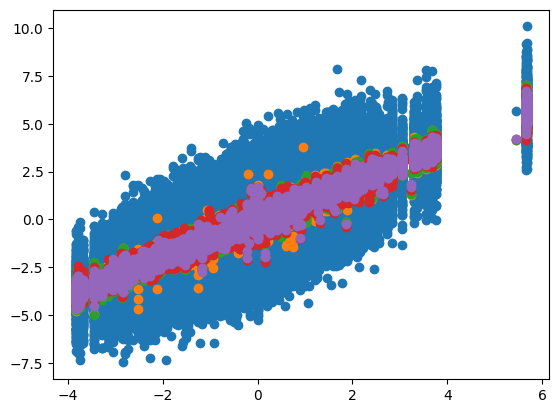

In [ ]:
plt.scatter(L@f_mat,Z)
plt.scatter(L@f_mat,mycebmf0.L@mycebmf0.F.T )
plt.scatter(L@f_mat,mycebmf1.L@mycebmf1.F.T )

plt.scatter(L@f_mat,mycebmf2.L@ mycebmf2.F.T )

plt.scatter(L@f_mat,mycebmf01.L@mycebmf01.F.T )

In [ ]:
print(torch.mean((L@f_mat - mycebmf0.L@ mycebmf0.F.T )**2))
print(torch.mean((L@f_mat - mycebmf01.L@ mycebmf01.F.T )**2))
print(torch.mean((L@f_mat - mycebmf1.L@ mycebmf1.F.T )**2))
print(torch.mean((L@f_mat - mycebmf2.L@ mycebmf2.F.T )**2)) 

tensor(0.0374)
tensor(0.0169)
tensor(0.0305)
tensor(0.0356)
